In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
df

ID               Name  Age  Gender          Location School_Grade  \
0        1    Shannon Francis   13  Female        Hansonfort          9th   
1        2    Scott Rodriguez   17  Female      Theodorefort          7th   
2        3        Adrian Knox   13   Other       Lindseystad         11th   
3        4  Brittany Hamilton   18  Female      West Anthony         12th   
4        5       Steven Smith   14   Other  Port Lindsaystad          9th   
...    ...                ...  ...     ...               ...          ...   
2995  2996        Jesus Yates   16  Female      New Jennifer         12th   
2996  2997     Bethany Murray   13  Female       Richardport          8th   
2997  2998      Norman Hughes   14   Other        Rebeccaton          7th   
2998  2999     Barbara Hinton   17  Female      Ramirezmouth          9th   
2999  3000     Curtis Johnson   17    Male    Lake Alexander         10th   

      Daily_Usage_Hours  Sleep_Hours  Academic_Performance  \
0                   4.0          6.1                    78   
1                   5.5          6.5                    70   
2                   5.8          5.5                    93   
3                   3.1          3.9                    78   
4                   2.5          6.7                    56   
...                 ...          ...                   ...   
2995                3.9          6.4                    53   
2996                3.6          7.3                    93   
2997                3.2          6.5                    98   
2998                6.7          7.5                    67   
2999                3.5          6.9                    79   

      Social_Interactions  ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  \
0                       5  ...                     NaN                    86   
1                       5  ...                     0.9                    96   
2                       8  ...                     0.5                   137   
3                       8  ...                     1.4                   128   
4                       4  ...                     1.0                    96   
...                   ...  ...                     ...                   ...   
2995                    4  ...                     0.3                    80   
2996                    5  ...                     0.9                    45   
2997                    1  ...                     0.2                    51   
2998                    3  ...                     1.6                   125   
2999                    4  ...                     0.6                   117   

      Apps_Used_Daily  Time_on_Social_Media  Time_on_Gaming  \
0                  19                   3.6             1.7   
1                   9                   1.1             4.0   
2                   8                   0.3             1.5   
3                   7                   3.1             1.6   
4                  20                   2.6             0.9   
...               ...                   ...             ...   
2995               15                   2.7             1.8   
2996                8                   3.1             0.0   
2997               13                   2.4             0.2   
2998               17                   1.7             2.6   
2999                8                   0.0             2.3   

      Time_on_Education  Phone_Usage_Purpose  Family_Communication  \
0                   1.2             Browsing                     4   
1                   1.8             Browsing                     2   
2                   0.4            Education                     6   
3                   0.8         Social Media                     8   
4                   1.1               Gaming                    10   
...                 ...                  ...                   ...   
2995                1.0                Other                     8   
2996                0.3               Gaming                

### Question 1

Check Below
- DataFrame Shape
- Data Types
- Duplicate records (remove if found)
- Missing/Null Values (replace with median value)

In [4]:
print("Shape:", df.shape)
print("Data Types:", df.dtypes)
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

Shape: (3000, 25)
Data Types: ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object


In [5]:
# Handle missing values with median
print("Missing Before:\n", df.isnull().sum())
df = df.fillna(df.median(numeric_only=True))
print("Missing After:\n", df.isnull().sum())

Missing Before:
 ID                         0
Name                       0
Age                        0
Gender                     0
Location                   0
School_Grade               0
Daily_Usage_Hours          5
Sleep_Hours                0
Academic_Performance       0
Social_Interactions        0
Exercise_Hours             8
Anxiety_Level              0
Depression_Level           0
Self_Esteem                0
Parental_Control           0
Screen_Time_Before_Bed    15
Phone_Checks_Per_Day       0
Apps_Used_Daily            0
Time_on_Social_Media       0
Time_on_Gaming             0
Time_on_Education          0
Phone_Usage_Purpose        0
Family_Communication       0
Weekend_Usage_Hours        0
Addiction_Level            0
dtype: int64
Missing After:
 ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Acade

### Question 2:

How does time spent on social media compare to time spent on education among teens?

- Plot side-by-side histograms of Time on Social Media and Time on Education
- Find and compare the median time for both.
- Write simple comments to explain what the data shows

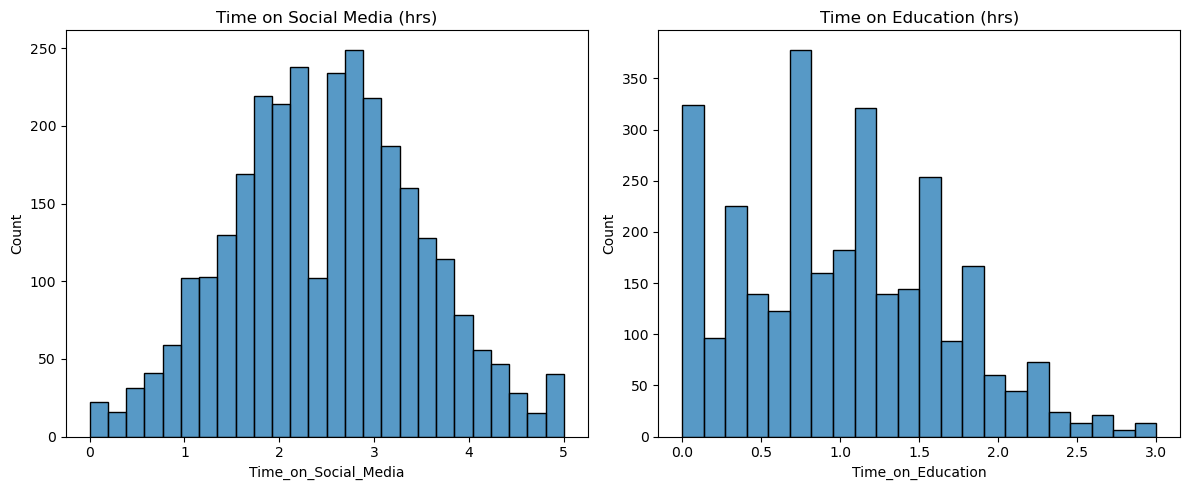

In [7]:
plt.figure(figsize=(12, 5))

# Social Media
plt.subplot(1, 2, 1)
sns.histplot(df['Time_on_Social_Media'])
plt.title("Time on Social Media (hrs)")

# Education
plt.subplot(1, 2, 2)
sns.histplot(df['Time_on_Education'])
plt.title("Time on Education (hrs)")

plt.tight_layout()
plt.show()


In [8]:
median_social = df["Time_on_Social_Media"].median()
median_education = df["Time_on_Education"].median()

print("Median Time on Social Media:", median_social, "hours/day")
print("Median Time on Education:", median_education, "hours/day")

Median Time on Social Media: 2.5 hours/day
Median Time on Education: 1.0 hours/day


Comments: Teens generally spend more time on social media than education

### Question 3

- How can we detect and identify outliers in Daily Usage Hours, Exercise Hours, and Screen Time Before Bed among teens using the IQR method?
- Display the records corresponding to these outliers using boxplot.



Outliers in Daily Usage Hours: 14
Outliers in Exercise Hours: 17
Outliers in Screen Time Before Bed: 2


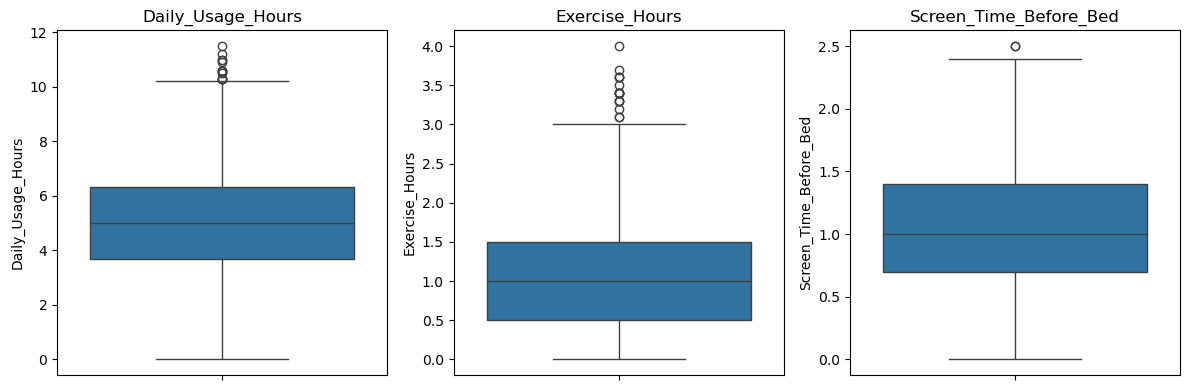

In [11]:
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Outliers in three columns
outliers_daily = detect_outliers_iqr("Daily_Usage_Hours")
outliers_exercise = detect_outliers_iqr("Exercise_Hours")
outliers_screen = detect_outliers_iqr("Screen_Time_Before_Bed")

print("Outliers in Daily Usage Hours:", outliers_daily.shape[0])
print("Outliers in Exercise Hours:", outliers_exercise.shape[0])
print("Outliers in Screen Time Before Bed:", outliers_screen.shape[0])

# Boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(["Daily_Usage_Hours", "Exercise_Hours", "Screen_Time_Before_Bed"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Question 4

Analyze the correlation heatmap showing relationships between teen behaviors, screen usage, and mental health indicators.

Focus your attention on the following numeric variables:

- Daily_Usage_Hours, Sleep_Hours, Academic_Performance, Addiction_Level, Time_on_Social_Media,

- Time_on_Gaming, Time_on_Education, Apps_Used_Daily, Anxiety_Level, Depression_Level,

- Self_Esteem, Social_Interactions, Exercise_Hours, Screen_Time_Before_Bed,

- Phone_Checks_Per_Day, Family_Communication, Weekend_Usage_Hours


Identify two strong positive and two strong negative correlation involving any of the above variables.

Explain briefly what these correlations might suggest about teen behavior, wellbeing, or digital habits.

Use specific values from the heatmap to support your observation.



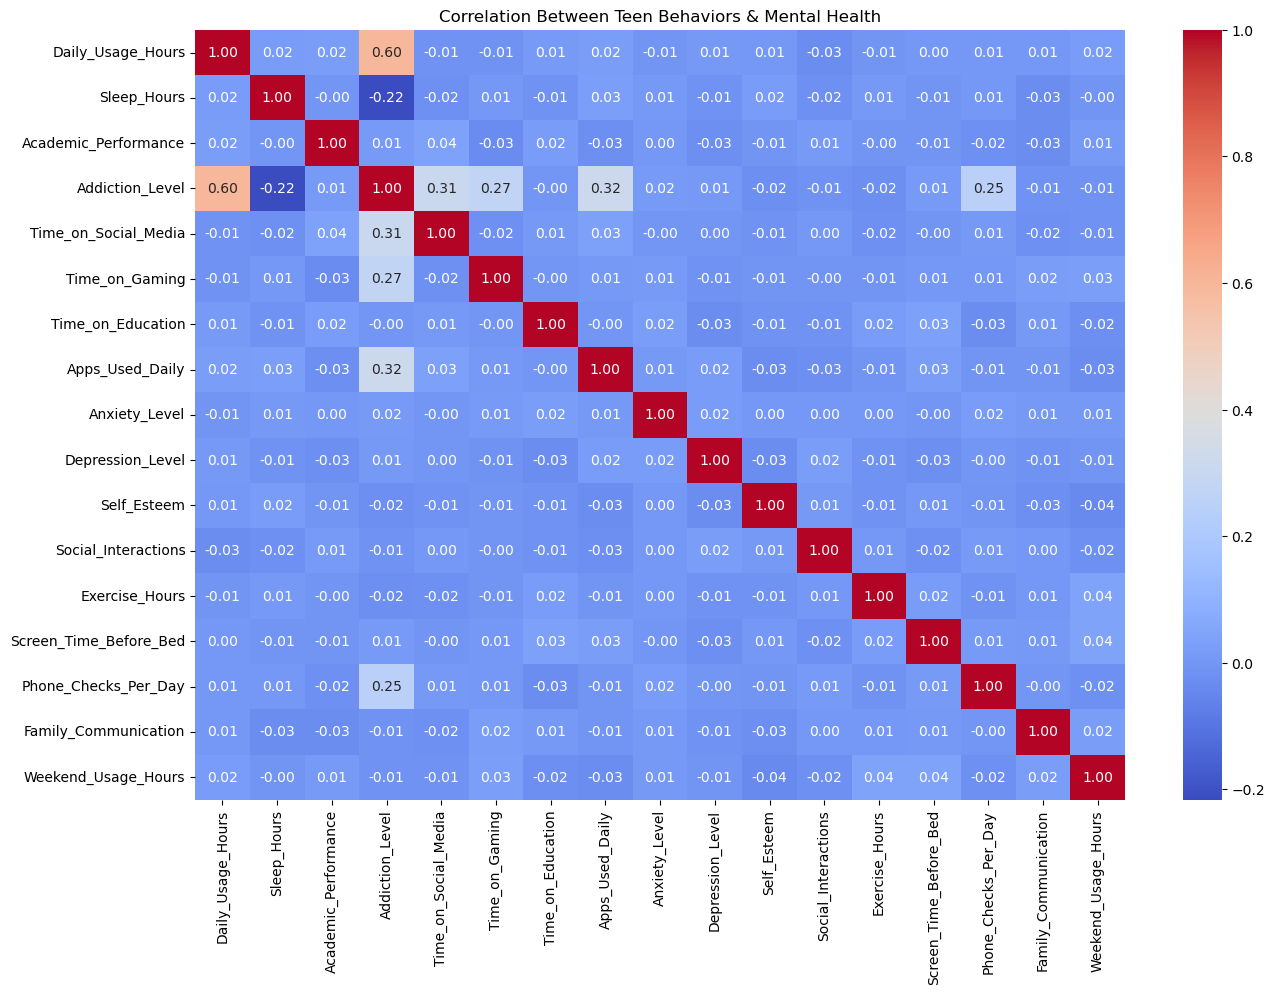

In [13]:
selected_columns = [
    "Daily_Usage_Hours", "Sleep_Hours", "Academic_Performance", "Addiction_Level",
    "Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education", "Apps_Used_Daily",
    "Anxiety_Level", "Depression_Level", "Self_Esteem", "Social_Interactions",
    "Exercise_Hours", "Screen_Time_Before_Bed", "Phone_Checks_Per_Day",
    "Family_Communication", "Weekend_Usage_Hours"
]

# Compute correlation matrix
corr_matrix = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Teen Behaviors & Mental Health")
plt.show()


Strong Positive:
More phone checking, more time on social media means higher addiction

Strong Negative:
More the addiction, lower will be the academic performance and sleep

### Question 5

How does the average addiction level vary across different age groups? Show with line graph

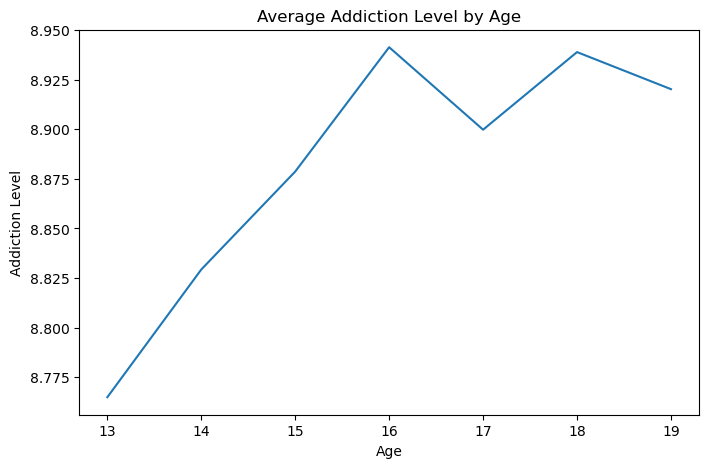

In [16]:
age_avg = df.groupby('Age')['Addiction_Level'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='Addiction_Level', data=age_avg)
plt.title("Average Addiction Level by Age")
plt.xlabel("Age")
plt.ylabel("Addiction Level")
plt.show()
